In [1]:
import scipy.stats
import os
import csv
from scipy.special import erf, erfinv
import numpy as np
%matplotlib nbagg
import matplotlib.pyplot as plt

In [2]:

interval=3291
dt=811.0*3

doublings=interval/dt
d1=15.5
d0=d1/2.0**doublings
d0

6.069363645997591

In [3]:
d0=0.1
d1=15.5
doublings=np.log2(d1/d0)
dt=interval/doublings
dt

452.30122750711297

<IPython.core.display.Javascript object>


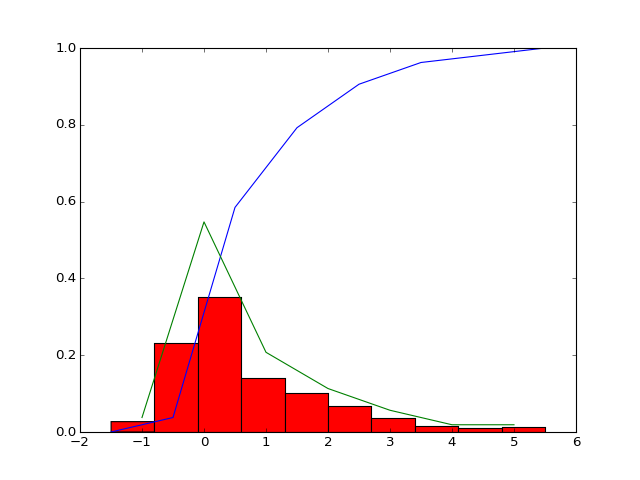

(array([ 0.027 ,  0.2327,  0.3518,  0.1414,  0.1008,  0.068 ,  0.0373,
         0.0167,  0.0113,  0.013 ]),
 array([-1.49842308, -0.79866721, -0.09891135,  0.60084452,  1.30060038,
         2.00035625,  2.70011211,  3.39986797,  4.09962384,  4.7993797 ,
         5.49913557]),
 <a list of 10 Patch objects>)

In [4]:
n = 53.0
freqs = [0, 2, 31, 42, 48, 51, 52, 53]
cdf = np.array([freq/n for freq in freqs])
xs = np.arange(-1.5, 6.5, 1.0)

pdf=np.diff(cdf)

plt.figure()
plt.plot(xs,cdf)
plt.plot((xs[0:-1]+xs[1:])/2,pdf)
N=10000
plt.hist(np.interp(np.random.rand(N),cdf,xs),weights=(np.ones(N)*1./N))

<IPython.core.display.Javascript object>


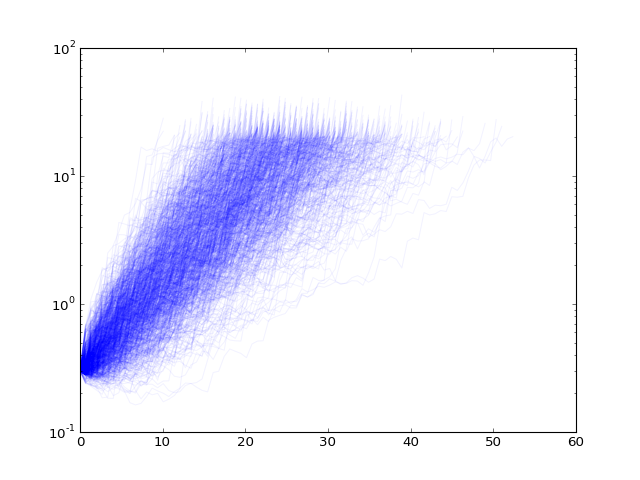

<IPython.core.display.Javascript object>


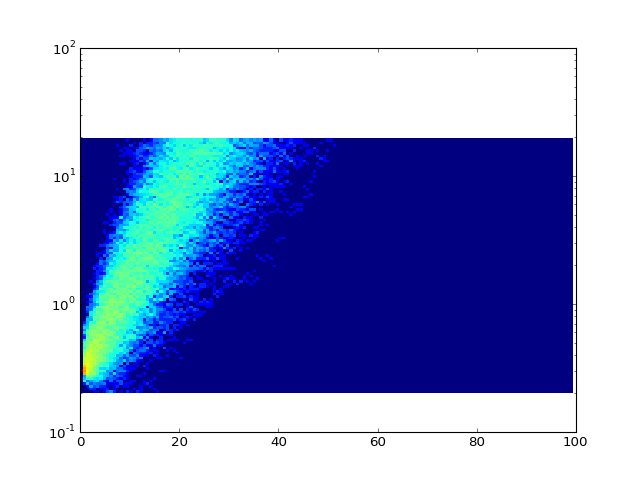

In [44]:
maxsize=20.
minsize=0.3
interval=245


sizesedges=np.logspace(np.log10(0.2),np.log10(20),101)
times=np.arange(0,100,interval/365.)
sizes=(sizesedges[1:]+sizesedges[:-1])/2

distribution=np.zeros((times.shape[0],sizes.shape[0]))

plt.figure()
for i in range(1000):
    timeslist=[]
    sizeslist=[]
    size=minsize
    timeslist.append(0)
    ti=0
    sizeslist.append(size)
    
    si=np.digitize([size],sizesedges)[0]-1
    
    distribution[ti,si]+=1
    while size<maxsize:
        rdt=np.interp(np.random.rand(),cdf,xs)
        vdt=365/rdt
        dt=3*vdt
        doublings=interval/dt
        size=size*2.0**doublings
        
        timeslist.append(timeslist[-1]+interval)
        sizeslist.append(size)
        ti+=1
        
        si=np.digitize([size],sizesedges)[0]-1
        if si<distribution.shape[1]:
            distribution[ti,si]+=1
        
        
    plt.semilogy(np.array(timeslist)/365.,np.array(sizeslist),'b',alpha=0.05)

plt.figure()
plt.pcolormesh(times,sizes,np.log(distribution.T+1))
plt.gca().set_yscale('log')

<IPython.core.display.Javascript object>


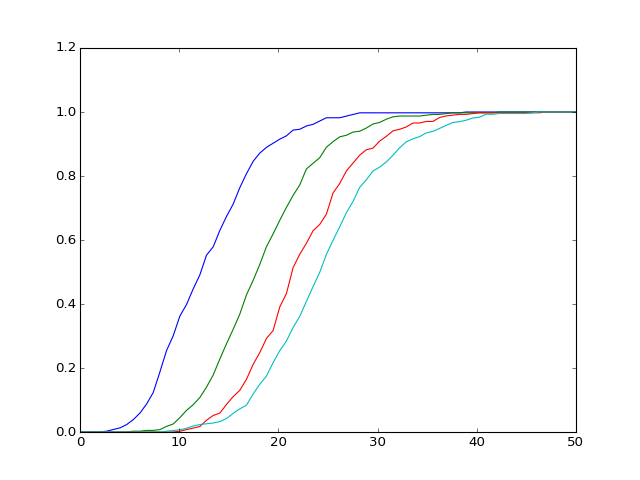

(0, 50)

In [46]:
plt.figure()

for size in [2,5,10,15]:
    ind=np.argmin(np.abs(size-sizes))
    dist=distribution[:,ind]
    dist=dist/dist.sum()
    plt.plot(times,np.cumsum(dist))
plt.xlim(0,50)

<IPython.core.display.Javascript object>


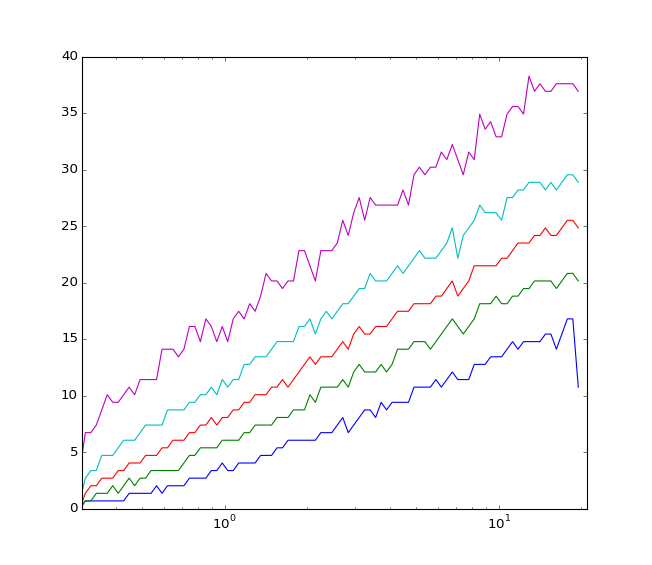

(0.3, 21)

In [75]:
plt.figure()

for percentile in [5,25,50,75,95]:
    distnorm=((distribution)/distribution.sum(0))
    #dist=dist/dist.sum()
    
    distnormcum=np.cumsum(distnorm,0)
    
    info=[]
    for i in range(len(sizes)):
        ind=np.where(distnormcum[:,i]>=percentile/100.)[0][0]
        info.append(times[ind])
    
    plt.plot(sizes,info)
plt.xlim(0,50)
plt.gca().set_xscale('log')
plt.xlim(0.3,21)

In [88]:
ind=np.argmin(np.abs(15.5-sizes))
dist=distribution[:,ind]
dist=dist/dist.sum()

dist[times>8].sum()

1.0